In [46]:
from fforma import *
import pandas as pd
from fforma.train_models import trainBasicModels
import random
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import seaborn as sns

In [47]:
#data
m3 = pd.read_csv('data/data_m3/dataM3.csv').query('freq=="M"')[['id', 'fecha', 'value', 'type']]
m4 = pd.read_csv('data/data_m4/Monthly-train.csv')

In [48]:
ids_m3 = m3['id'].unique()

In [49]:
train_m3 = m3.query('type=="train"')[['id', 'value', 'fecha']]
test_m3 = m3.query('type=="test"')[['id', 'value', 'fecha']]

In [50]:
train_m3['id_fecha'] = train_m3.groupby('id').cumcount() + 1
test_m3['id_fecha'] = test_m3.groupby('id').cumcount() + 1

In [51]:
train_m3 = train_m3.pivot(index='id', columns='id_fecha', values='value').reset_index()
test_m3 = test_m3.pivot(index='id', columns='id_fecha', values='value').reset_index()

In [52]:
# Training size
_N = 500
_N_m4_alone = _N
_N_m3 = int(_N/2)
_N_m4 = int(_N/2)

In [53]:
#N samples
n_samples = 100

In [54]:
#random samples
samples_m4_alone = [[row.dropna().values for idx, row  in m4.sample(_N_m4_alone).set_index('V1').iterrows()] for i in range(n_samples)]

In [55]:
samples_m3_alone = [[row.dropna().values for idx, row  in train_m3.sample(_N).set_index('id').iterrows()] for i in range(n_samples)]

In [56]:
samples_m4_m3 = [
    [row.dropna().values for idx, row  in m4.sample(_N_m3).set_index('V1').iterrows()] + [row.dropna().values for idx, row  in train_m3.sample(_N_m3).set_index('id').iterrows()]
    for i in range(n_samples)
]

In [57]:
def split_data(ts_list_train, val_periods, test_periods, frcy, basic_models = [Naive(), SeasonalNaive(), RandomWalkDrift(), ETS()]):
    # Validation set
    ts_train_for_val = [ts[:-val_periods] for ts in ts_list_train] 
    ts_val_list = [ts[-val_periods:] for ts in ts_list_train]
    
    # Prediction for validation set and train set
    ts_hat_val_list = trainBasicModels().train(basic_models, ts_train_for_val, frcy).predict(val_periods)
    #ts_hat_list = trainBasicModels().train(basic_models, ts_list_train, frcy).predict(test_periods)
    
    return ts_val_list, ts_hat_val_list

In [58]:
val_periods=18
test_periods=18
frcy=12

In [59]:
data_training_m4_alone = [[ts_list] + list(split_data(ts_list, val_periods, test_periods, frcy)) for ts_list in samples_m4_alone]

100%|██████████| 500/500 [00:00<00:00, 502.56it/s]


In [60]:
data_training_m3_alone = [[ts_list] + list(split_data(ts_list, val_periods, test_periods, frcy)) for ts_list in samples_m3_alone]

100%|██████████| 500/500 [00:00<00:00, 628.94it/s]


In [61]:
data_training_m4_m3 = [[ts_list] + list(split_data(ts_list, val_periods, test_periods, frcy)) for ts_list in samples_m4_m3]

100%|██████████| 500/500 [00:01<00:00, 487.64it/s]


In [62]:
def train_fforma_samples(data_training, evals):
    return [FForma(li[0], li[1], li[2], [], frcy, evals).train() for li in data_training]

In [63]:
fforma_m4_alone = train_fforma_samples(data_training_m4_alone, 10)

  4%|▍         | 20/500 [00:00<00:02, 197.53it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 274.83it/s]
500it [00:00, 18290.50it/s]
500it [00:00, 6673.47it/s]
500it [00:00, 71411.86it/s]
500it [00:00, 20398.13it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:29<00:00,  2.80s/it, best loss: 107.01901769085467]


  3%|▎         | 16/500 [00:00<00:03, 158.39it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 276.06it/s]
500it [00:00, 21085.38it/s]
500it [00:00, 7564.45it/s]
500it [00:00, 78193.59it/s]
500it [00:00, 28762.39it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:26<00:00,  2.78s/it, best loss: 99.24032528824772]


  3%|▎         | 15/500 [00:00<00:03, 147.83it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 257.09it/s]
500it [00:00, 17024.83it/s]
500it [00:00, 6657.46it/s]
500it [00:00, 61775.42it/s]
500it [00:00, 24840.71it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:25<00:00,  2.69s/it, best loss: 110.36750520240514]


  3%|▎         | 16/500 [00:00<00:03, 156.59it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 246.95it/s]
500it [00:00, 20274.48it/s]
500it [00:00, 7034.52it/s]
500it [00:00, 75377.47it/s]
500it [00:00, 27831.40it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:23<00:00,  2.10s/it, best loss: 115.20528357341729]


  3%|▎         | 16/500 [00:00<00:03, 159.36it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 240.71it/s]
500it [00:00, 18934.54it/s]
500it [00:00, 6981.36it/s]
500it [00:00, 81760.31it/s]
500it [00:00, 26385.58it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:27<00:00,  2.59s/it, best loss: 99.85203575964876]


  4%|▍         | 20/500 [00:00<00:02, 190.67it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 240.85it/s]
500it [00:00, 19705.45it/s]
500it [00:00, 7528.36it/s]
500it [00:00, 83990.23it/s]
500it [00:00, 31031.22it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:26<00:00,  2.19s/it, best loss: 117.29342060149311]


  4%|▍         | 20/500 [00:00<00:02, 191.68it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 240.86it/s]
500it [00:00, 18449.15it/s]
500it [00:00, 6895.51it/s]
500it [00:00, 82822.64it/s]
500it [00:00, 24465.14it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:13<00:00,  1.29s/it, best loss: 107.19906508730774]


  4%|▍         | 22/500 [00:00<00:02, 207.36it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 236.17it/s]
500it [00:00, 19075.60it/s]
500it [00:00, 6014.12it/s]
500it [00:00, 72820.31it/s]
500it [00:00, 27918.85it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:27<00:00,  2.15s/it, best loss: 119.26485485001946]


  4%|▍         | 19/500 [00:00<00:02, 189.06it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 264.81it/s]
500it [00:00, 19262.55it/s]
500it [00:00, 7350.92it/s]
500it [00:00, 78813.63it/s]
500it [00:00, 27019.24it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:24<00:00,  2.37s/it, best loss: 108.14204697461749]


  3%|▎         | 15/500 [00:00<00:03, 145.28it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 267.41it/s]
500it [00:00, 19708.96it/s]
500it [00:00, 7413.50it/s]
500it [00:00, 78257.78it/s]
500it [00:00, 27634.83it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:15<00:00,  1.47s/it, best loss: 104.42398540013468]


  3%|▎         | 17/500 [00:00<00:02, 165.08it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 249.47it/s]
500it [00:00, 19972.50it/s]
500it [00:00, 7507.36it/s]
500it [00:00, 81303.87it/s]
500it [00:00, 27237.86it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:25<00:00,  2.84s/it, best loss: 120.46255567966514]


  4%|▍         | 21/500 [00:00<00:02, 205.18it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 273.66it/s]
500it [00:00, 19642.69it/s]
500it [00:00, 7381.58it/s]
500it [00:00, 82630.10it/s]
500it [00:00, 27975.45it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:29<00:00,  2.97s/it, best loss: 108.44871245079851]


  3%|▎         | 17/500 [00:00<00:02, 162.76it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 248.64it/s]
500it [00:00, 20277.42it/s]
500it [00:00, 7207.72it/s]
500it [00:00, 78798.83it/s]
500it [00:00, 26795.53it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:28<00:00,  3.04s/it, best loss: 88.35604686705665]


  4%|▍         | 19/500 [00:00<00:02, 184.21it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 245.58it/s]
500it [00:00, 18556.24it/s]
500it [00:00, 7057.17it/s]
500it [00:00, 84963.42it/s]
500it [00:00, 29406.06it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:27<00:00,  2.86s/it, best loss: 115.05383776708388]


  3%|▎         | 16/500 [00:00<00:03, 158.34it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 241.88it/s]
500it [00:00, 17645.37it/s]
500it [00:00, 6801.78it/s]
500it [00:00, 79497.80it/s]
500it [00:00, 26418.15it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:29<00:00,  2.98s/it, best loss: 104.5115205447833]


  4%|▎         | 18/500 [00:00<00:02, 171.30it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 226.46it/s]
500it [00:00, 18657.77it/s]
500it [00:00, 7072.64it/s]
500it [00:00, 74714.17it/s]
500it [00:00, 26875.19it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:31<00:00,  3.12s/it, best loss: 101.86724838956745]


  4%|▍         | 19/500 [00:00<00:02, 189.74it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 254.59it/s]
500it [00:00, 18945.32it/s]
500it [00:00, 7161.03it/s]
500it [00:00, 83865.95it/s]
500it [00:00, 29934.51it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:28<00:00,  2.86s/it, best loss: 106.05916986489778]


  3%|▎         | 13/500 [00:00<00:03, 128.26it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 235.13it/s]
500it [00:00, 18317.34it/s]
500it [00:00, 6993.35it/s]
500it [00:00, 75934.25it/s]
500it [00:00, 31276.04it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:29<00:00,  3.05s/it, best loss: 106.01147055391475]


  4%|▍         | 19/500 [00:00<00:02, 183.04it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 245.05it/s]
500it [00:00, 18138.00it/s]
500it [00:00, 6838.71it/s]
500it [00:00, 76754.09it/s]
500it [00:00, 25563.18it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:30<00:00,  3.11s/it, best loss: 111.56296975939526]


  5%|▌         | 25/500 [00:00<00:01, 249.70it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 237.12it/s]
500it [00:00, 18370.29it/s]
500it [00:00, 6971.36it/s]
500it [00:00, 74517.71it/s]
500it [00:00, 29345.16it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:32<00:00,  3.16s/it, best loss: 127.31750784385386]


  4%|▎         | 18/500 [00:00<00:02, 178.80it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 230.32it/s]
500it [00:00, 15690.67it/s]
500it [00:00, 5939.41it/s]
500it [00:00, 66355.07it/s]
500it [00:00, 23457.03it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:22<00:00,  2.65s/it, best loss: 115.19432840935966]


  3%|▎         | 16/500 [00:00<00:03, 159.20it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 240.11it/s]
500it [00:00, 18388.65it/s]
500it [00:00, 6943.34it/s]
500it [00:00, 34791.91it/s]
500it [00:00, 27759.20it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:34<00:00,  3.59s/it, best loss: 104.290127732546]


  3%|▎         | 16/500 [00:00<00:03, 152.64it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 233.07it/s]
500it [00:00, 18417.23it/s]
500it [00:00, 6852.88it/s]
500it [00:00, 72382.98it/s]
500it [00:00, 26986.90it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:37<00:00,  3.66s/it, best loss: 115.01731193163519]


  3%|▎         | 17/500 [00:00<00:02, 167.51it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 234.23it/s]
500it [00:00, 20572.42it/s]
500it [00:00, 7051.67it/s]
500it [00:00, 73247.60it/s]
500it [00:00, 26988.64it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:32<00:00,  3.33s/it, best loss: 105.91984759189165]


  3%|▎         | 17/500 [00:00<00:02, 161.25it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 210.34it/s]
500it [00:00, 17510.27it/s]
500it [00:00, 6568.05it/s]
500it [00:00, 81021.17it/s]
500it [00:00, 27689.20it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:36<00:00,  3.58s/it, best loss: 119.38078264462068]


  3%|▎         | 16/500 [00:00<00:03, 155.54it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 208.54it/s]
500it [00:00, 16623.35it/s]
500it [00:00, 6071.22it/s]
500it [00:00, 66308.91it/s]
500it [00:00, 23500.92it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:36<00:00,  3.67s/it, best loss: 101.73421054714956]


  5%|▍         | 23/500 [00:00<00:02, 219.16it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 235.84it/s]
500it [00:00, 19629.82it/s]
500it [00:00, 6497.44it/s]
500it [00:00, 75728.60it/s]
500it [00:00, 24324.96it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:22<00:00,  1.92s/it, best loss: 118.21085278188114]


  3%|▎         | 15/500 [00:00<00:03, 147.99it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 213.07it/s]
500it [00:00, 12460.94it/s]
500it [00:00, 4887.65it/s]
500it [00:00, 59397.63it/s]
500it [00:00, 21395.80it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:36<00:00,  3.51s/it, best loss: 104.46430986735781]


  3%|▎         | 17/500 [00:00<00:03, 148.44it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 204.01it/s]
500it [00:00, 15914.28it/s]
500it [00:00, 5918.61it/s]
500it [00:00, 67173.35it/s]
500it [00:00, 22977.96it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:23<00:00,  2.89s/it, best loss: 107.8588100060181]


  3%|▎         | 16/500 [00:00<00:03, 155.47it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 212.91it/s]
500it [00:00, 18107.46it/s]
500it [00:00, 5904.89it/s]
500it [00:00, 63677.42it/s]
500it [00:00, 26915.20it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:37<00:00,  3.70s/it, best loss: 111.0756039865263]


  4%|▎         | 18/500 [00:00<00:02, 165.91it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 219.21it/s]
500it [00:00, 19382.72it/s]
500it [00:00, 6074.76it/s]
500it [00:00, 65380.72it/s]
500it [00:00, 25013.74it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:34<00:00,  3.50s/it, best loss: 108.43632018475549]


  3%|▎         | 15/500 [00:00<00:03, 144.31it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 222.50it/s]
500it [00:00, 16508.72it/s]
500it [00:00, 6250.45it/s]
500it [00:00, 70253.99it/s]
500it [00:00, 23559.27it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:33<00:00,  3.27s/it, best loss: 104.464869007803]


  4%|▍         | 19/500 [00:00<00:02, 186.53it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 216.41it/s]
500it [00:00, 15066.07it/s]
500it [00:00, 5801.15it/s]
500it [00:00, 64863.05it/s]
500it [00:00, 23192.17it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:38<00:00,  3.82s/it, best loss: 121.3452379395531]


  4%|▍         | 19/500 [00:00<00:02, 171.51it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 217.99it/s]
500it [00:00, 17115.98it/s]
500it [00:00, 6437.58it/s]
500it [00:00, 72450.49it/s]
500it [00:00, 25610.94it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:34<00:00,  3.26s/it, best loss: 120.3413614780657]


  3%|▎         | 17/500 [00:00<00:03, 158.91it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 198.29it/s]
500it [00:00, 12409.62it/s]
500it [00:00, 5787.35it/s]
500it [00:00, 63440.48it/s]
500it [00:00, 23034.99it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:38<00:00,  4.09s/it, best loss: 109.22377807000159]


  4%|▎         | 18/500 [00:00<00:02, 165.61it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 216.38it/s]
500it [00:00, 19381.29it/s]
500it [00:00, 6889.55it/s]
500it [00:00, 75209.87it/s]
500it [00:00, 23802.87it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:30<00:00,  3.19s/it, best loss: 95.44549534532224]


  3%|▎         | 15/500 [00:00<00:03, 130.27it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 211.20it/s]
500it [00:00, 12133.56it/s]
500it [00:00, 5803.08it/s]
500it [00:00, 62866.15it/s]
500it [00:00, 22695.47it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:19<00:00,  1.92s/it, best loss: 108.51624766046393]


  2%|▏         | 11/500 [00:00<00:04, 108.28it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 196.33it/s]
500it [00:00, 15829.83it/s]
500it [00:00, 5815.91it/s]
500it [00:00, 62311.39it/s]
500it [00:00, 21530.01it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:39<00:00,  3.78s/it, best loss: 112.82885720427787]


  3%|▎         | 14/500 [00:00<00:03, 131.11it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 219.07it/s]
500it [00:00, 17456.05it/s]
500it [00:00, 6590.24it/s]
500it [00:00, 75989.27it/s]
500it [00:00, 25156.26it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:29<00:00,  3.33s/it, best loss: 103.44390724205515]


  4%|▍         | 22/500 [00:00<00:02, 208.91it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 210.85it/s]
500it [00:00, 16400.27it/s]
500it [00:00, 5776.18it/s]
500it [00:00, 75374.76it/s]
500it [00:00, 27400.50it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:29<00:00,  3.00s/it, best loss: 101.94770717864652]


  4%|▍         | 20/500 [00:00<00:02, 197.64it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 219.76it/s]
500it [00:00, 15922.86it/s]
500it [00:00, 6157.75it/s]
500it [00:00, 68355.67it/s]
500it [00:00, 23308.94it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:38<00:00,  3.78s/it, best loss: 104.0558091902578]


  4%|▎         | 18/500 [00:00<00:02, 167.33it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 202.53it/s]
500it [00:00, 16837.97it/s]
500it [00:00, 4370.59it/s]
500it [00:00, 70549.42it/s]
500it [00:00, 24681.09it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:38<00:00,  3.91s/it, best loss: 126.44590163515821]


  3%|▎         | 17/500 [00:00<00:03, 159.40it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 218.94it/s]
500it [00:00, 15710.89it/s]
500it [00:00, 6503.99it/s]
500it [00:00, 75725.86it/s]
500it [00:00, 25787.61it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:35<00:00,  3.87s/it, best loss: 117.83618542694119]


  3%|▎         | 14/500 [00:00<00:03, 132.47it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 210.04it/s]
500it [00:00, 15445.33it/s]
500it [00:00, 5736.35it/s]
500it [00:00, 64209.67it/s]
500it [00:00, 22260.16it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:15<00:00,  1.39s/it, best loss: 106.99050747116543]


  4%|▍         | 22/500 [00:00<00:02, 204.77it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 207.92it/s]
500it [00:00, 17525.04it/s]
500it [00:00, 6691.53it/s]
500it [00:00, 75840.88it/s]
500it [00:00, 26214.40it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:38<00:00,  3.78s/it, best loss: 116.85277360738132]


  4%|▍         | 19/500 [00:00<00:02, 183.12it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 216.09it/s]
500it [00:00, 16201.61it/s]
500it [00:00, 6213.51it/s]
500it [00:00, 71658.31it/s]
500it [00:00, 24358.86it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:38<00:00,  3.99s/it, best loss: 105.7251925856016]


  4%|▍         | 20/500 [00:00<00:02, 197.44it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 202.75it/s]
500it [00:00, 16995.71it/s]
500it [00:00, 6256.79it/s]
500it [00:00, 69723.78it/s]
500it [00:00, 28236.11it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:21<00:00,  2.02s/it, best loss: 111.334149167675]


  4%|▎         | 18/500 [00:00<00:02, 175.21it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 208.03it/s]
500it [00:00, 15022.79it/s]
500it [00:00, 5886.73it/s]
500it [00:00, 66033.31it/s]
500it [00:00, 22453.21it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:22<00:00,  2.08s/it, best loss: 112.39020060660546]


  4%|▍         | 21/500 [00:00<00:02, 199.76it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 229.85it/s]
500it [00:00, 18523.62it/s]
500it [00:00, 6192.24it/s]
500it [00:00, 70485.40it/s]
500it [00:00, 24206.75it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:31<00:00,  3.52s/it, best loss: 103.6273553647491]


  3%|▎         | 15/500 [00:00<00:03, 134.89it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 189.63it/s]
500it [00:00, 15751.60it/s]
500it [00:00, 6106.93it/s]
500it [00:00, 69297.56it/s]
500it [00:00, 23731.22it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:35<00:00,  3.83s/it, best loss: 117.37606488985054]


  3%|▎         | 16/500 [00:00<00:03, 154.07it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:03<00:00, 162.21it/s]
500it [00:00, 14118.15it/s]
500it [00:00, 5343.23it/s]
500it [00:00, 60384.45it/s]
500it [00:00, 18029.01it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:43<00:00,  4.03s/it, best loss: 99.59203542593967]


  3%|▎         | 16/500 [00:00<00:03, 155.94it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 195.49it/s]
500it [00:00, 16064.47it/s]
500it [00:00, 6021.78it/s]
500it [00:00, 69014.78it/s]
500it [00:00, 25707.95it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:45<00:00,  4.45s/it, best loss: 122.79405227599065]


  1%|▏         | 7/500 [00:00<00:07, 67.21it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 200.59it/s]
500it [00:00, 17046.00it/s]
500it [00:00, 6420.16it/s]
500it [00:00, 73700.65it/s]
500it [00:00, 26366.34it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:44<00:00,  4.78s/it, best loss: 115.26760044527292]


  3%|▎         | 13/500 [00:00<00:03, 124.36it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 187.50it/s]
500it [00:00, 16928.90it/s]
500it [00:00, 5604.38it/s]
500it [00:00, 62732.64it/s]
500it [00:00, 24240.33it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:28<00:00,  2.95s/it, best loss: 108.83923398320466]


  3%|▎         | 15/500 [00:00<00:03, 148.03it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 207.22it/s]
500it [00:00, 15616.82it/s]
500it [00:00, 6055.18it/s]
500it [00:00, 67278.95it/s]
500it [00:00, 20618.94it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:26<00:00,  3.12s/it, best loss: 116.07384054404348]


  3%|▎         | 15/500 [00:00<00:03, 148.00it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 169.05it/s]
500it [00:00, 14012.68it/s]
500it [00:00, 4554.44it/s]
500it [00:00, 65011.84it/s]
500it [00:00, 18956.11it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:34<00:00,  3.66s/it, best loss: 115.62903793882006]


  2%|▏         | 12/500 [00:00<00:04, 113.61it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 189.02it/s]
500it [00:00, 11823.40it/s]
500it [00:00, 5845.72it/s]
500it [00:00, 72385.48it/s]
500it [00:00, 27153.22it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:29<00:00,  3.29s/it, best loss: 107.82557065911296]


  3%|▎         | 15/500 [00:00<00:03, 144.75it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 179.15it/s]
500it [00:00, 13971.98it/s]
500it [00:00, 5018.00it/s]
500it [00:00, 68073.88it/s]
500it [00:00, 21634.62it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:43<00:00,  4.45s/it, best loss: 107.06601457711083]


  4%|▎         | 18/500 [00:00<00:02, 164.20it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 183.77it/s]
500it [00:00, 13905.09it/s]
500it [00:00, 5678.31it/s]
500it [00:00, 75420.84it/s]
500it [00:00, 23056.52it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:32<00:00,  3.26s/it, best loss: 118.37352583512943]


  4%|▍         | 19/500 [00:00<00:02, 178.39it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 189.30it/s]
500it [00:00, 16066.93it/s]
500it [00:00, 5199.74it/s]
500it [00:00, 63945.36it/s]
500it [00:00, 21536.20it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:44<00:00,  4.49s/it, best loss: 111.17480570273]


  3%|▎         | 17/500 [00:00<00:03, 154.93it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 186.08it/s]
500it [00:00, 13904.54it/s]
500it [00:00, 5249.28it/s]
500it [00:00, 56759.55it/s]
500it [00:00, 24496.29it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:51<00:00,  5.16s/it, best loss: 127.30247891009628]


  2%|▏         | 12/500 [00:00<00:04, 118.96it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 198.91it/s]
500it [00:00, 15705.71it/s]
500it [00:00, 5837.32it/s]
500it [00:00, 66239.80it/s]
500it [00:00, 18202.71it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:38<00:00,  3.91s/it, best loss: 122.13959134817857]


  2%|▏         | 12/500 [00:00<00:04, 113.93it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 212.74it/s]
500it [00:00, 15548.86it/s]
500it [00:00, 5709.07it/s]
500it [00:00, 62886.89it/s]
500it [00:00, 18790.00it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:25<00:00,  2.82s/it, best loss: 114.44635542569141]


  3%|▎         | 15/500 [00:00<00:03, 139.84it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 200.70it/s]
500it [00:00, 15638.95it/s]
500it [00:00, 5582.61it/s]
500it [00:00, 64643.12it/s]
500it [00:00, 22520.48it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:36<00:00,  3.86s/it, best loss: 120.18646910194144]


  2%|▏         | 11/500 [00:00<00:04, 108.94it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 212.28it/s]
500it [00:00, 18321.82it/s]
500it [00:00, 6669.93it/s]
500it [00:00, 71628.94it/s]
500it [00:00, 24966.69it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:34<00:00,  3.72s/it, best loss: 114.17944707763598]


  4%|▍         | 19/500 [00:00<00:02, 187.45it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 212.51it/s]
500it [00:00, 15737.41it/s]
500it [00:00, 5933.06it/s]
500it [00:00, 67070.23it/s]
500it [00:00, 22132.13it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:30<00:00,  3.06s/it, best loss: 107.56628521096872]


  4%|▍         | 19/500 [00:00<00:02, 186.79it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 232.74it/s]
500it [00:00, 15710.42it/s]
500it [00:00, 5659.26it/s]
500it [00:00, 66523.46it/s]
500it [00:00, 22595.21it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:26<00:00,  2.66s/it, best loss: 96.80305464819892]


  3%|▎         | 15/500 [00:00<00:03, 148.42it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 197.48it/s]
500it [00:00, 15906.55it/s]
500it [00:00, 6005.04it/s]
500it [00:00, 67413.03it/s]
500it [00:00, 24567.75it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:29<00:00,  3.63s/it, best loss: 108.22417509930644]


  3%|▎         | 16/500 [00:00<00:03, 157.34it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 211.97it/s]
500it [00:00, 17405.05it/s]
500it [00:00, 6147.66it/s]
500it [00:00, 69501.96it/s]
500it [00:00, 24286.08it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:24<00:00,  2.92s/it, best loss: 118.10207607872549]


  3%|▎         | 13/500 [00:00<00:03, 124.81it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 223.72it/s]
500it [00:00, 17202.88it/s]
500it [00:00, 6514.21it/s]
500it [00:00, 72500.59it/s]
500it [00:00, 25737.61it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:30<00:00,  2.99s/it, best loss: 100.81636759179537]


  3%|▎         | 15/500 [00:00<00:03, 138.32it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 209.29it/s]
500it [00:00, 15622.29it/s]
500it [00:00, 5811.23it/s]
500it [00:00, 64871.07it/s]
500it [00:00, 22583.29it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:33<00:00,  3.38s/it, best loss: 111.79101158651713]


  2%|▏         | 10/500 [00:00<00:04, 98.69it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 201.97it/s]
500it [00:00, 15064.02it/s]
500it [00:00, 5711.20it/s]
500it [00:00, 62156.25it/s]
500it [00:00, 21243.22it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:31<00:00,  3.50s/it, best loss: 120.52858649139222]


  2%|▏         | 11/500 [00:00<00:04, 109.93it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 196.34it/s]
500it [00:00, 18199.86it/s]
500it [00:00, 6591.34it/s]
500it [00:00, 66350.87it/s]
500it [00:00, 25442.54it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:34<00:00,  3.20s/it, best loss: 116.86295954767125]


  5%|▍         | 23/500 [00:00<00:02, 223.50it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 220.71it/s]
500it [00:00, 15265.23it/s]
500it [00:00, 5848.59it/s]
500it [00:00, 61415.41it/s]
500it [00:00, 23252.08it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:35<00:00,  3.57s/it, best loss: 120.04501194857043]


  3%|▎         | 15/500 [00:00<00:03, 147.57it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 227.62it/s]
500it [00:00, 17014.05it/s]
500it [00:00, 6405.59it/s]
500it [00:00, 82305.81it/s]
500it [00:00, 27158.15it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:36<00:00,  3.83s/it, best loss: 122.90092714437601]


  3%|▎         | 14/500 [00:00<00:03, 135.37it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 212.99it/s]
500it [00:00, 17753.97it/s]
500it [00:00, 6414.60it/s]
500it [00:00, 72807.67it/s]
500it [00:00, 25358.86it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:38<00:00,  3.70s/it, best loss: 110.77168657178035]


  3%|▎         | 13/500 [00:00<00:04, 120.02it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 220.44it/s]
500it [00:00, 17046.97it/s]
500it [00:00, 6794.44it/s]
500it [00:00, 76232.35it/s]
500it [00:00, 26065.50it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:35<00:00,  3.57s/it, best loss: 101.81053585879994]


  3%|▎         | 17/500 [00:00<00:02, 162.21it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 225.57it/s]
500it [00:00, 17208.39it/s]
500it [00:00, 6480.57it/s]
500it [00:00, 73911.05it/s]
500it [00:00, 25442.54it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:30<00:00,  3.35s/it, best loss: 110.53455205764253]


  3%|▎         | 15/500 [00:00<00:03, 130.75it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 214.20it/s]
500it [00:00, 15856.64it/s]
500it [00:00, 5911.07it/s]
500it [00:00, 66474.96it/s]
500it [00:00, 23599.57it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:32<00:00,  3.49s/it, best loss: 114.02600799554448]


  3%|▎         | 15/500 [00:00<00:03, 149.75it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 197.79it/s]
500it [00:00, 18470.93it/s]
500it [00:00, 6546.58it/s]
500it [00:00, 75543.10it/s]
500it [00:00, 26614.96it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:41<00:00,  4.01s/it, best loss: 112.08531252186654]


  2%|▏         | 12/500 [00:00<00:04, 119.73it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 206.66it/s]
500it [00:00, 15846.58it/s]
500it [00:00, 6122.61it/s]
500it [00:00, 71619.15it/s]
500it [00:00, 24525.23it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:31<00:00,  2.63s/it, best loss: 105.44917120170692]


  3%|▎         | 13/500 [00:00<00:04, 120.26it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 173.63it/s]
500it [00:00, 15106.33it/s]
500it [00:00, 5602.41it/s]
500it [00:00, 65636.51it/s]
500it [00:00, 21987.33it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:37<00:00,  2.98s/it, best loss: 106.7842680325011]


  4%|▍         | 19/500 [00:00<00:02, 180.65it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 213.45it/s]
500it [00:00, 17321.96it/s]
500it [00:00, 6459.59it/s]
500it [00:00, 76094.05it/s]
500it [00:00, 25837.50it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:35<00:00,  3.48s/it, best loss: 103.93111104130212]


  4%|▍         | 20/500 [00:00<00:02, 199.89it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 231.23it/s]
500it [00:00, 17620.31it/s]
500it [00:00, 6503.18it/s]
500it [00:00, 40434.04it/s]
500it [00:00, 16143.11it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:38<00:00,  3.87s/it, best loss: 103.39696094708866]


  4%|▍         | 21/500 [00:00<00:02, 188.14it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 203.43it/s]
500it [00:00, 15767.70it/s]
500it [00:00, 5917.34it/s]
500it [00:00, 67458.57it/s]
500it [00:00, 23334.10it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:33<00:00,  3.59s/it, best loss: 115.61333529862011]


  3%|▎         | 15/500 [00:00<00:03, 141.51it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 206.10it/s]
500it [00:00, 18348.75it/s]
500it [00:00, 6404.96it/s]
500it [00:00, 71763.75it/s]
500it [00:00, 24690.97it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:29<00:00,  3.48s/it, best loss: 114.08106834653225]


  3%|▎         | 15/500 [00:00<00:03, 145.12it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 216.48it/s]
500it [00:00, 16929.31it/s]
500it [00:00, 6426.40it/s]
500it [00:00, 71351.12it/s]
500it [00:00, 24390.03it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:38<00:00,  3.83s/it, best loss: 93.85992662230413]


  3%|▎         | 17/500 [00:00<00:02, 167.48it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 186.96it/s]
500it [00:00, 14742.62it/s]
500it [00:00, 5045.10it/s]
500it [00:00, 63396.37it/s]
500it [00:00, 22493.18it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:49<00:00,  4.34s/it, best loss: 94.61251591137828]


  3%|▎         | 15/500 [00:00<00:03, 135.67it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 214.23it/s]
500it [00:00, 15869.96it/s]
500it [00:00, 5875.18it/s]
500it [00:00, 54747.35it/s]
500it [00:00, 22966.88it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:38<00:00,  3.93s/it, best loss: 116.57733385393679]


  3%|▎         | 16/500 [00:00<00:03, 152.98it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 194.39it/s]
500it [00:00, 10546.88it/s]
500it [00:00, 3873.34it/s]
500it [00:00, 46214.15it/s]
0it [00:00, ?it/s]

Calculating errors
Naive 2 errors


500it [00:00, 15766.99it/s]


Computing features
100%|██████████| 10/10 [00:33<00:00,  3.15s/it, best loss: 111.80519437373036]


  4%|▍         | 19/500 [00:00<00:02, 174.84it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 186.53it/s]
500it [00:00, 14384.45it/s]
500it [00:00, 5634.45it/s]
500it [00:00, 68444.91it/s]
500it [00:00, 24798.12it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:48<00:00,  4.91s/it, best loss: 108.40529964370104]


  3%|▎         | 15/500 [00:00<00:03, 149.56it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 183.85it/s]
500it [00:00, 14303.02it/s]
500it [00:00, 5428.30it/s]
500it [00:00, 57443.63it/s]
500it [00:00, 22026.83it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:34<00:00,  2.98s/it, best loss: 115.91349868560022]


  3%|▎         | 15/500 [00:00<00:03, 142.57it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 190.68it/s]
500it [00:00, 15982.32it/s]
500it [00:00, 6409.68it/s]
500it [00:00, 60012.93it/s]
500it [00:00, 24220.17it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:42<00:00,  4.37s/it, best loss: 118.16984085365138]


  2%|▏         | 12/500 [00:00<00:04, 113.21it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 205.48it/s]
500it [00:00, 15719.95it/s]
500it [00:00, 5842.09it/s]
500it [00:00, 62898.21it/s]
500it [00:00, 22256.85it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:37<00:00,  3.89s/it, best loss: 105.33551625262497]


  2%|▏         | 9/500 [00:00<00:05, 88.60it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 193.01it/s]
500it [00:00, 15244.14it/s]
500it [00:00, 5634.55it/s]
500it [00:00, 63070.34it/s]
500it [00:00, 21852.62it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:38<00:00,  3.99s/it, best loss: 95.1324982477704]


  3%|▎         | 17/500 [00:00<00:02, 161.43it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 187.91it/s]
500it [00:00, 15565.47it/s]
500it [00:00, 5877.16it/s]
500it [00:00, 61420.81it/s]
500it [00:00, 22934.98it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:38<00:00,  3.93s/it, best loss: 118.50915102917189]


  3%|▎         | 13/500 [00:00<00:03, 121.78it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 209.95it/s]
500it [00:00, 17130.80it/s]
500it [00:00, 6424.86it/s]
500it [00:00, 70704.02it/s]
500it [00:00, 26392.88it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:39<00:00,  3.95s/it, best loss: 101.57932442127418]


  3%|▎         | 15/500 [00:00<00:03, 148.67it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 189.13it/s]
500it [00:00, 14792.74it/s]
500it [00:00, 5210.48it/s]
500it [00:00, 54714.50it/s]
500it [00:00, 19277.95it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:39<00:00,  4.27s/it, best loss: 108.02946013946709]


  3%|▎         | 13/500 [00:00<00:03, 125.74it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 202.66it/s]
500it [00:00, 13177.04it/s]
500it [00:00, 4859.81it/s]
500it [00:00, 69684.40it/s]
500it [00:00, 22134.46it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:38<00:00,  3.77s/it, best loss: 110.6181320944786]


  4%|▎         | 18/500 [00:00<00:02, 170.47it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 205.44it/s]
500it [00:00, 12627.36it/s]
500it [00:00, 4600.47it/s]
500it [00:00, 46666.64it/s]
500it [00:00, 19131.28it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:38<00:00,  3.52s/it, best loss: 94.22705791776048]


In [ ]:
fforma_m3_alone = train_fforma_samples(data_training_m3_alone, 10)

  6%|▌         | 31/500 [00:00<00:01, 305.95it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 397.30it/s]
500it [00:00, 15355.76it/s]
500it [00:00, 6167.73it/s]
500it [00:00, 74676.92it/s]
500it [00:00, 25648.53it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:30<00:00,  2.94s/it, best loss: 99.89446557718517]


  6%|▌         | 29/500 [00:00<00:01, 282.25it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 356.46it/s]
500it [00:00, 14298.63it/s]
500it [00:00, 6292.33it/s]
500it [00:00, 65770.31it/s]
500it [00:00, 25121.91it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:35<00:00,  3.21s/it, best loss: 112.16957556561552]


  7%|▋         | 34/500 [00:00<00:01, 332.22it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 385.46it/s]
500it [00:00, 15589.43it/s]
500it [00:00, 5974.74it/s]
500it [00:00, 65299.29it/s]
500it [00:00, 24777.32it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:34<00:00,  3.84s/it, best loss: 106.94787164640988]


  6%|▌         | 29/500 [00:00<00:01, 284.88it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 344.52it/s]
500it [00:00, 13300.05it/s]
500it [00:00, 5008.81it/s]
500it [00:00, 55759.01it/s]
500it [00:00, 20391.98it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:37<00:00,  3.80s/it, best loss: 93.21410568543509]


  4%|▍         | 21/500 [00:00<00:02, 205.84it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 325.98it/s]
500it [00:00, 14498.51it/s]
500it [00:00, 5857.52it/s]
500it [00:00, 31590.75it/s]
500it [00:00, 22359.84it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:31<00:00,  3.32s/it, best loss: 102.26634857599586]


  6%|▌         | 28/500 [00:00<00:01, 269.06it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 394.43it/s]
500it [00:00, 16740.65it/s]
500it [00:00, 6599.38it/s]
500it [00:00, 73275.75it/s]
500it [00:00, 26065.82it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:35<00:00,  3.76s/it, best loss: 96.7783020440367]


  6%|▌         | 29/500 [00:00<00:01, 285.77it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 382.73it/s]
500it [00:00, 15282.69it/s]
500it [00:00, 5921.33it/s]
500it [00:00, 65171.45it/s]
500it [00:00, 14344.40it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:42<00:00,  3.26s/it, best loss: 102.26568915293701]


  5%|▌         | 26/500 [00:00<00:01, 255.68it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 336.32it/s]
500it [00:00, 13685.77it/s]
500it [00:00, 5450.43it/s]
500it [00:00, 62734.51it/s]
500it [00:00, 22269.14it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:31<00:00,  3.14s/it, best loss: 100.45125626608242]


  6%|▌         | 29/500 [00:00<00:01, 280.41it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 345.33it/s]
500it [00:00, 14660.38it/s]
500it [00:00, 5994.72it/s]
500it [00:00, 64949.43it/s]
500it [00:00, 23285.91it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:20<00:00,  2.27s/it, best loss: 104.54747636530449]


  6%|▌         | 28/500 [00:00<00:01, 268.51it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 355.14it/s]
500it [00:00, 15980.98it/s]
500it [00:00, 6020.64it/s]
500it [00:00, 67475.93it/s]
500it [00:00, 24083.33it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:34<00:00,  3.52s/it, best loss: 103.76955070522861]


  5%|▌         | 26/500 [00:00<00:01, 251.98it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 353.79it/s]
500it [00:00, 15634.29it/s]
500it [00:00, 6076.80it/s]
500it [00:00, 64977.60it/s]
500it [00:00, 23774.81it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:29<00:00,  2.80s/it, best loss: 100.33688543970078]


  5%|▌         | 27/500 [00:00<00:01, 252.80it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 402.17it/s]
500it [00:00, 16460.90it/s]
500it [00:00, 6333.57it/s]
500it [00:00, 70948.00it/s]
500it [00:00, 26111.26it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:25<00:00,  2.60s/it, best loss: 105.56138943752617]


  6%|▋         | 32/500 [00:00<00:01, 314.54it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 407.29it/s]
500it [00:00, 16545.84it/s]
500it [00:00, 6528.55it/s]
500it [00:00, 73838.18it/s]
500it [00:00, 27390.84it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:30<00:00,  3.06s/it, best loss: 103.55607952486531]


  6%|▌         | 31/500 [00:00<00:01, 308.13it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 410.06it/s]
500it [00:00, 17384.13it/s]
500it [00:00, 6894.33it/s]
500it [00:00, 33860.53it/s]
500it [00:00, 23955.41it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:28<00:00,  2.43s/it, best loss: 91.214394414413]


  5%|▌         | 26/500 [00:00<00:01, 254.85it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 419.27it/s]
500it [00:00, 16342.76it/s]
500it [00:00, 6499.55it/s]
500it [00:00, 73607.53it/s]
500it [00:00, 25868.41it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:33<00:00,  3.45s/it, best loss: 102.99937903693747]


  6%|▌         | 29/500 [00:00<00:01, 286.21it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 364.25it/s]
500it [00:00, 17550.56it/s]
500it [00:00, 6937.07it/s]
500it [00:00, 75518.62it/s]
500it [00:00, 27954.20it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:31<00:00,  3.24s/it, best loss: 95.6072711872958]


  7%|▋         | 33/500 [00:00<00:01, 329.92it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 431.70it/s]
500it [00:00, 18900.24it/s]
500it [00:00, 7178.88it/s]
500it [00:00, 73211.80it/s]
500it [00:00, 26837.02it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:24<00:00,  2.62s/it, best loss: 87.78683807094862]


  7%|▋         | 34/500 [00:00<00:01, 335.81it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 408.23it/s]
500it [00:00, 17166.41it/s]
500it [00:00, 6777.93it/s]
500it [00:00, 72967.26it/s]
500it [00:00, 26241.63it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:20<00:00,  2.14s/it, best loss: 104.47703005249254]


  7%|▋         | 37/500 [00:00<00:01, 368.11it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 429.91it/s]
500it [00:00, 15774.82it/s]
500it [00:00, 6085.83it/s]
500it [00:00, 65478.71it/s]
500it [00:00, 21529.12it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:34<00:00,  4.97s/it, best loss: 117.05263335812195]


  6%|▌         | 30/500 [00:00<00:01, 287.75it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 358.68it/s]
500it [00:00, 17093.10it/s]
500it [00:00, 5148.28it/s]
500it [00:00, 46383.83it/s]
500it [00:00, 24568.61it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:34<00:00,  3.57s/it, best loss: 97.02254652880382]


  7%|▋         | 36/500 [00:00<00:01, 350.50it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 419.28it/s]
500it [00:00, 17856.16it/s]
500it [00:00, 6953.98it/s]
500it [00:00, 71886.74it/s]
500it [00:00, 25036.73it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:30<00:00,  3.15s/it, best loss: 101.332139048662]


  6%|▌         | 29/500 [00:00<00:01, 283.41it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 325.16it/s]
500it [00:00, 14118.81it/s]
500it [00:00, 5756.93it/s]
500it [00:00, 75418.13it/s]
500it [00:00, 23771.84it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:36<00:00,  3.63s/it, best loss: 98.60020255314276]


  6%|▌         | 31/500 [00:00<00:01, 300.58it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 403.31it/s]
500it [00:00, 16327.75it/s]
500it [00:00, 6579.57it/s]
500it [00:00, 71012.87it/s]
500it [00:00, 26783.89it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:34<00:00,  3.20s/it, best loss: 102.01520331968116]


  6%|▌         | 31/500 [00:00<00:01, 301.58it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 425.92it/s]
500it [00:00, 17461.28it/s]
500it [00:00, 6520.91it/s]
500it [00:00, 65191.71it/s]
500it [00:00, 24106.30it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:33<00:00,  3.32s/it, best loss: 96.12687956336333]


  7%|▋         | 36/500 [00:00<00:01, 357.88it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 433.86it/s]
500it [00:00, 16027.76it/s]
500it [00:00, 6586.43it/s]
500it [00:00, 77405.68it/s]
500it [00:00, 27658.89it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:29<00:00,  2.94s/it, best loss: 91.94839326930013]


  7%|▋         | 34/500 [00:00<00:01, 333.79it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 425.78it/s]
500it [00:00, 15352.39it/s]
500it [00:00, 5937.53it/s]
500it [00:00, 65960.62it/s]
500it [00:00, 23890.73it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:33<00:00,  3.51s/it, best loss: 103.83909211000606]


  6%|▌         | 30/500 [00:00<00:01, 290.53it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 422.42it/s]
500it [00:00, 17822.92it/s]
500it [00:00, 6781.08it/s]
500it [00:00, 74573.36it/s]
500it [00:00, 27276.83it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:34<00:00,  3.38s/it, best loss: 87.62791139929995]


  7%|▋         | 35/500 [00:00<00:01, 347.11it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 411.84it/s]
500it [00:00, 19502.40it/s]
500it [00:00, 6717.38it/s]
500it [00:00, 72600.98it/s]
500it [00:00, 25619.39it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:19<00:00,  2.02s/it, best loss: 94.01442063076959]


  6%|▌         | 29/500 [00:00<00:01, 288.86it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 315.12it/s]
500it [00:00, 15775.53it/s]
500it [00:00, 6035.84it/s]
500it [00:00, 59964.89it/s]
500it [00:00, 23777.77it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:34<00:00,  3.47s/it, best loss: 109.51659637276165]


  7%|▋         | 33/500 [00:00<00:01, 329.37it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 407.77it/s]
500it [00:00, 15844.06it/s]
500it [00:00, 6035.11it/s]
500it [00:00, 65141.08it/s]
500it [00:00, 23454.14it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:24<00:00,  2.53s/it, best loss: 100.22189371153607]


  6%|▌         | 31/500 [00:00<00:01, 301.34it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 404.40it/s]
500it [00:00, 18124.68it/s]
500it [00:00, 6861.94it/s]
500it [00:00, 76003.04it/s]
500it [00:00, 27543.37it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:35<00:00,  3.66s/it, best loss: 93.77611230270915]


  7%|▋         | 37/500 [00:00<00:01, 364.92it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 395.79it/s]
500it [00:00, 17691.51it/s]
500it [00:00, 5933.65it/s]
500it [00:00, 59719.00it/s]
500it [00:00, 23579.14it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:41<00:00,  3.74s/it, best loss: 89.88160269513865]


  6%|▌         | 31/500 [00:00<00:01, 299.20it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 406.36it/s]
500it [00:00, 13534.12it/s]
500it [00:00, 5605.36it/s]
500it [00:00, 65834.31it/s]
500it [00:00, 23752.46it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:33<00:00,  3.39s/it, best loss: 108.65423200973507]


  6%|▋         | 32/500 [00:00<00:01, 311.55it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 379.85it/s]
500it [00:00, 13886.86it/s]
500it [00:00, 5603.42it/s]
500it [00:00, 64605.28it/s]
500it [00:00, 24293.96it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:35<00:00,  3.53s/it, best loss: 100.7416706830096]


  6%|▌         | 31/500 [00:00<00:01, 298.82it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 396.31it/s]
500it [00:00, 16611.76it/s]
500it [00:00, 6527.98it/s]
500it [00:00, 71210.59it/s]
500it [00:00, 26460.82it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:35<00:00,  3.53s/it, best loss: 93.44087025319526]


  7%|▋         | 34/500 [00:00<00:01, 333.36it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 412.97it/s]
500it [00:00, 15954.72it/s]
500it [00:00, 5675.16it/s]
500it [00:00, 66620.67it/s]
500it [00:00, 22850.02it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:26<00:00,  3.20s/it, best loss: 93.89688358988403]


  6%|▌         | 31/500 [00:00<00:01, 300.65it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 437.74it/s]
500it [00:00, 18128.91it/s]
500it [00:00, 6954.27it/s]
500it [00:00, 76016.82it/s]
500it [00:00, 26328.60it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:33<00:00,  3.31s/it, best loss: 109.34424312812949]


  7%|▋         | 35/500 [00:00<00:01, 341.71it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 414.42it/s]
500it [00:00, 17156.58it/s]
500it [00:00, 6847.31it/s]
500it [00:00, 76276.71it/s]
500it [00:00, 26756.55it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:20<00:00,  2.11s/it, best loss: 103.85089067346306]


  7%|▋         | 35/500 [00:00<00:01, 341.60it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 411.89it/s]
500it [00:00, 16998.88it/s]
500it [00:00, 6583.20it/s]
500it [00:00, 75164.04it/s]
500it [00:00, 26785.26it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:22<00:00,  1.69s/it, best loss: 100.73550172844315]


  6%|▋         | 32/500 [00:00<00:01, 314.75it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 395.11it/s]
500it [00:00, 16998.47it/s]
500it [00:00, 6727.92it/s]
500it [00:00, 73321.87it/s]
500it [00:00, 28578.95it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:23<00:00,  2.45s/it, best loss: 95.60240057742764]


  7%|▋         | 37/500 [00:00<00:01, 369.95it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 401.09it/s]
500it [00:00, 16507.16it/s]
500it [00:00, 6457.70it/s]
500it [00:00, 72893.71it/s]
500it [00:00, 26216.69it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:28<00:00,  2.54s/it, best loss: 102.03551045616757]


  6%|▌         | 28/500 [00:00<00:01, 269.27it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 410.67it/s]
500it [00:00, 16844.32it/s]
500it [00:00, 6744.25it/s]
500it [00:00, 71943.46it/s]
500it [00:00, 26214.07it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:27<00:00,  2.91s/it, best loss: 103.15884942007823]


  6%|▌         | 31/500 [00:00<00:01, 302.31it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 407.47it/s]
500it [00:00, 17373.91it/s]
500it [00:00, 6603.17it/s]
500it [00:00, 72042.32it/s]
500it [00:00, 25771.14it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:37<00:00,  3.91s/it, best loss: 105.30253472097822]


  7%|▋         | 33/500 [00:00<00:01, 321.25it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 393.47it/s]
500it [00:00, 16474.09it/s]
500it [00:00, 6380.08it/s]
500it [00:00, 62242.96it/s]
500it [00:00, 22869.95it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:17<00:00,  1.53s/it, best loss: 115.10688250012117]


  9%|▊         | 43/500 [00:00<00:01, 428.16it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 419.54it/s]
500it [00:00, 15045.86it/s]
500it [00:00, 5999.04it/s]
500it [00:00, 64393.02it/s]
500it [00:00, 23398.66it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:39<00:00,  4.56s/it, best loss: 117.41608135670312]


  6%|▌         | 29/500 [00:00<00:01, 282.92it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 415.81it/s]
500it [00:00, 17673.77it/s]
500it [00:00, 6944.46it/s]
500it [00:00, 74621.12it/s]
500it [00:00, 27723.97it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:31<00:00,  3.30s/it, best loss: 100.71928099805518]


  5%|▌         | 26/500 [00:00<00:01, 257.93it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 332.04it/s]
500it [00:00, 15252.79it/s]
500it [00:00, 5932.91it/s]
500it [00:00, 68222.25it/s]
500it [00:00, 26284.38it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:43<00:00,  4.57s/it, best loss: 102.13575229849606]


  5%|▌         | 25/500 [00:00<00:01, 244.77it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 340.34it/s]
500it [00:00, 14525.73it/s]
500it [00:00, 4515.39it/s]
500it [00:00, 65745.56it/s]
500it [00:00, 17581.46it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:38<00:00,  3.69s/it, best loss: 97.77828773003328]


  6%|▌         | 31/500 [00:00<00:01, 300.02it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 367.21it/s]
500it [00:00, 13961.10it/s]
500it [00:00, 5673.71it/s]
500it [00:00, 60721.89it/s]
500it [00:00, 22030.06it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:33<00:00,  3.39s/it, best loss: 92.31227142310289]


  6%|▌         | 30/500 [00:00<00:01, 299.02it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 353.89it/s]
500it [00:00, 14595.79it/s]
500it [00:00, 5246.26it/s]
500it [00:00, 53259.65it/s]
500it [00:00, 21707.18it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:32<00:00,  3.45s/it, best loss: 101.4958209024271]


  5%|▌         | 27/500 [00:00<00:01, 259.23it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 320.44it/s]
500it [00:00, 16581.29it/s]
500it [00:00, 6154.73it/s]
500it [00:00, 68849.38it/s]
500it [00:00, 23890.46it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:39<00:00,  3.77s/it, best loss: 100.06948945809482]


  6%|▌         | 31/500 [00:00<00:01, 305.29it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 390.52it/s]
500it [00:00, 14209.79it/s]
500it [00:00, 6855.52it/s]
500it [00:00, 73030.78it/s]
500it [00:00, 27872.46it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:37<00:00,  3.68s/it, best loss: 97.17198437710393]


  7%|▋         | 34/500 [00:00<00:01, 335.14it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 386.75it/s]
500it [00:00, 14328.82it/s]
500it [00:00, 4489.65it/s]
500it [00:00, 59739.41it/s]
500it [00:00, 23810.71it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:35<00:00,  3.86s/it, best loss: 96.7397487207175]


  5%|▌         | 26/500 [00:00<00:01, 253.77it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 365.09it/s]
500it [00:00, 13226.07it/s]
500it [00:00, 5756.54it/s]
500it [00:00, 65962.70it/s]
500it [00:00, 23969.64it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:31<00:00,  3.41s/it, best loss: 100.52547676016667]


  5%|▌         | 26/500 [00:00<00:01, 249.82it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 396.55it/s]
500it [00:00, 16860.03it/s]
500it [00:00, 6184.90it/s]
500it [00:00, 69856.17it/s]
500it [00:00, 26505.63it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:37<00:00,  3.78s/it, best loss: 110.84440129733758]


  6%|▌         | 31/500 [00:00<00:01, 304.91it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 422.81it/s]
500it [00:00, 16072.84it/s]
500it [00:00, 6446.43it/s]
500it [00:00, 70943.20it/s]
500it [00:00, 27297.78it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:24<00:00,  2.80s/it, best loss: 104.37607098685166]


  5%|▌         | 26/500 [00:00<00:01, 256.74it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 398.95it/s]
500it [00:00, 15466.75it/s]
500it [00:00, 6019.55it/s]
500it [00:00, 65632.40it/s]
500it [00:00, 22802.07it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:29<00:00,  3.07s/it, best loss: 112.05708325535979]


  6%|▌         | 29/500 [00:00<00:01, 288.25it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 409.62it/s]
500it [00:00, 17574.54it/s]
500it [00:00, 6915.93it/s]
500it [00:00, 73744.71it/s]
500it [00:00, 27294.58it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:37<00:00,  4.27s/it, best loss: 104.12267487812404]


  6%|▌         | 29/500 [00:00<00:01, 282.86it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 359.94it/s]
500it [00:00, 15054.82it/s]
500it [00:00, 6139.67it/s]
500it [00:00, 65388.88it/s]
500it [00:00, 21387.73it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:42<00:00,  4.50s/it, best loss: 96.11523829045318]


  6%|▌         | 28/500 [00:00<00:01, 270.12it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 376.33it/s]
500it [00:00, 16372.74it/s]
500it [00:00, 5860.96it/s]
500it [00:00, 57211.70it/s]
500it [00:00, 23503.82it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:42<00:00,  4.44s/it, best loss: 103.19505050194375]


  6%|▋         | 32/500 [00:00<00:01, 315.61it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 373.61it/s]
500it [00:00, 14785.02it/s]
500it [00:00, 5876.93it/s]
500it [00:00, 71292.90it/s]
500it [00:00, 25807.29it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:35<00:00,  3.79s/it, best loss: 92.8919283215291]


  4%|▍         | 22/500 [00:00<00:02, 216.16it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 341.63it/s]
500it [00:00, 14886.93it/s]
500it [00:00, 6057.42it/s]
500it [00:00, 60781.73it/s]
500it [00:00, 23696.90it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:27<00:00,  2.51s/it, best loss: 106.49613499219112]


  7%|▋         | 33/500 [00:00<00:01, 319.62it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 344.78it/s]
500it [00:00, 14848.36it/s]
500it [00:00, 5844.50it/s]
500it [00:00, 59770.06it/s]
500it [00:00, 26386.57it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:38<00:00,  4.05s/it, best loss: 108.97516054945736]


  5%|▌         | 27/500 [00:00<00:01, 258.77it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 356.89it/s]
500it [00:00, 17760.58it/s]
500it [00:00, 6445.89it/s]
500it [00:00, 62183.90it/s]
500it [00:00, 24930.18it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:31<00:00,  2.70s/it, best loss: 102.79822989459646]


  6%|▌         | 31/500 [00:00<00:01, 307.43it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 383.03it/s]
500it [00:00, 15818.61it/s]
500it [00:00, 5373.68it/s]
500it [00:00, 65634.45it/s]
500it [00:00, 23909.52it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:37<00:00,  3.96s/it, best loss: 103.91632466471606]


  6%|▌         | 29/500 [00:00<00:01, 280.64it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 360.83it/s]
500it [00:00, 14687.17it/s]
500it [00:00, 5701.88it/s]
500it [00:00, 57085.55it/s]
500it [00:00, 22777.80it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:24<00:00,  2.86s/it, best loss: 91.01115990250845]


  6%|▌         | 31/500 [00:00<00:01, 304.10it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 359.33it/s]
500it [00:00, 15598.82it/s]
500it [00:00, 6267.94it/s]
500it [00:00, 66418.12it/s]
500it [00:00, 23555.04it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:35<00:00,  3.58s/it, best loss: 108.98702987550143]


  6%|▌         | 30/500 [00:00<00:01, 298.85it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 401.74it/s]
500it [00:00, 15802.75it/s]
500it [00:00, 6014.25it/s]
500it [00:00, 62541.81it/s]
500it [00:00, 22333.41it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:29<00:00,  3.06s/it, best loss: 108.0569183627251]


  6%|▌         | 30/500 [00:00<00:01, 288.93it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 384.36it/s]
500it [00:00, 16588.64it/s]
500it [00:00, 6567.60it/s]
500it [00:00, 72483.05it/s]
500it [00:00, 26314.39it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:29<00:00,  2.90s/it, best loss: 100.61147124683616]


  5%|▌         | 27/500 [00:00<00:01, 268.08it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 364.35it/s]
500it [00:00, 14405.20it/s]
500it [00:00, 5586.73it/s]
500it [00:00, 57546.09it/s]
500it [00:00, 16982.36it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:27<00:00,  2.06s/it, best loss: 105.61143949137792]


  7%|▋         | 33/500 [00:00<00:01, 319.71it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 394.01it/s]
500it [00:00, 15846.22it/s]
500it [00:00, 6062.11it/s]
500it [00:00, 70237.52it/s]
500it [00:00, 28050.29it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:36<00:00,  3.56s/it, best loss: 101.51824549774736]


  6%|▌         | 31/500 [00:00<00:01, 301.90it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 408.54it/s]
500it [00:00, 16108.15it/s]
500it [00:00, 6117.98it/s]
500it [00:00, 65946.10it/s]
500it [00:00, 24442.33it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:34<00:00,  3.78s/it, best loss: 99.39336030153677]


  6%|▌         | 29/500 [00:00<00:01, 288.01it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 389.15it/s]
500it [00:00, 14789.30it/s]
500it [00:00, 6008.77it/s]
500it [00:00, 64535.70it/s]
500it [00:00, 23824.78it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:22<00:00,  2.45s/it, best loss: 103.05000905619501]


  6%|▌         | 29/500 [00:00<00:01, 289.52it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 402.72it/s]
500it [00:00, 16850.41it/s]
500it [00:00, 7187.49it/s]
500it [00:00, 69222.08it/s]
500it [00:00, 30358.31it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:36<00:00,  3.31s/it, best loss: 99.08450208546506]


  7%|▋         | 35/500 [00:00<00:01, 344.63it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 411.61it/s]
500it [00:00, 15865.64it/s]
500it [00:00, 7050.86it/s]
500it [00:00, 70251.64it/s]
500it [00:00, 25640.69it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:36<00:00,  3.72s/it, best loss: 104.33526470186531]


  6%|▌         | 29/500 [00:00<00:01, 287.29it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 391.95it/s]
500it [00:00, 13387.93it/s]
500it [00:00, 5139.28it/s]
500it [00:00, 51702.38it/s]
500it [00:00, 19767.67it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:29<00:00,  3.44s/it, best loss: 109.83492660665036]


  6%|▌         | 29/500 [00:00<00:01, 283.75it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 395.16it/s]
500it [00:00, 15270.23it/s]
500it [00:00, 6332.54it/s]
500it [00:00, 69267.80it/s]
500it [00:00, 23376.49it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:34<00:00,  3.26s/it, best loss: 99.20921607092613]


  6%|▌         | 31/500 [00:00<00:01, 304.06it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 397.48it/s]
500it [00:00, 15622.17it/s]
500it [00:00, 6594.38it/s]
500it [00:00, 75515.90it/s]
500it [00:00, 25904.84it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:27<00:00,  2.73s/it, best loss: 103.7100724527599]


  6%|▋         | 32/500 [00:00<00:01, 316.64it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 399.80it/s]
500it [00:00, 15381.56it/s]
500it [00:00, 5984.78it/s]
500it [00:00, 66085.33it/s]
500it [00:00, 23105.29it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:34<00:00,  3.51s/it, best loss: 103.76511913559453]


  6%|▌         | 30/500 [00:00<00:01, 298.21it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 352.48it/s]
500it [00:00, 10942.67it/s]
500it [00:00, 4188.52it/s]
500it [00:00, 46347.95it/s]
0it [00:00, ?it/s]

Calculating errors
Naive 2 errors


500it [00:00, 16365.97it/s]


Computing features
100%|██████████| 10/10 [00:32<00:00,  3.19s/it, best loss: 92.75451162438713]


  8%|▊         | 41/500 [00:00<00:01, 406.56it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 382.08it/s]
500it [00:00, 14349.90it/s]
500it [00:00, 6911.03it/s]
500it [00:00, 73365.47it/s]
500it [00:00, 26526.08it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:33<00:00,  3.51s/it, best loss: 111.13442766061212]


  6%|▌         | 28/500 [00:00<00:01, 279.55it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 392.09it/s]
500it [00:00, 15720.43it/s]
500it [00:00, 6038.81it/s]
500it [00:00, 73742.11it/s]
500it [00:00, 27855.06it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:26<00:00,  2.46s/it, best loss: 107.33416924085414]


  7%|▋         | 33/500 [00:00<00:01, 328.48it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 409.70it/s]
500it [00:00, 15666.99it/s]
500it [00:00, 5811.35it/s]
500it [00:00, 65591.34it/s]
500it [00:00, 23248.99it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:27<00:00,  2.67s/it, best loss: 104.20984348881088]


  6%|▌         | 28/500 [00:00<00:01, 273.75it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 367.95it/s]
500it [00:00, 15269.00it/s]
500it [00:00, 5911.43it/s]
500it [00:00, 65591.34it/s]
500it [00:00, 22590.59it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:32<00:00,  3.13s/it, best loss: 108.89899427348865]


  5%|▌         | 27/500 [00:00<00:01, 260.90it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 381.17it/s]
500it [00:00, 15908.49it/s]
500it [00:00, 6098.00it/s]
500it [00:00, 64072.35it/s]
500it [00:00, 24330.04it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:38<00:00,  3.57s/it, best loss: 106.62463395450783]


  6%|▌         | 30/500 [00:00<00:01, 298.32it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 367.72it/s]
500it [00:00, 15773.87it/s]
500it [00:00, 6102.07it/s]
500it [00:00, 64925.30it/s]
500it [00:00, 26165.99it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:26<00:00,  2.67s/it, best loss: 108.45794065683265]


  5%|▌         | 27/500 [00:00<00:01, 269.02it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 373.75it/s]
500it [00:00, 15845.62it/s]
500it [00:00, 6051.76it/s]
500it [00:00, 63421.30it/s]
500it [00:00, 22623.98it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:36<00:00,  3.76s/it, best loss: 112.3052292161076]


  6%|▋         | 32/500 [00:00<00:01, 307.70it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 398.11it/s]
500it [00:00, 15827.92it/s]
500it [00:00, 6105.89it/s]
500it [00:00, 64861.04it/s]
500it [00:00, 24098.27it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:18<00:00,  2.12s/it, best loss: 95.52716632444549]


  5%|▌         | 27/500 [00:00<00:01, 264.52it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 404.63it/s]
500it [00:00, 15667.46it/s]
500it [00:00, 6553.91it/s]
500it [00:00, 68333.40it/s]
500it [00:00, 25268.11it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:31<00:00,  3.27s/it, best loss: 103.45057846713442]


  5%|▍         | 24/500 [00:00<00:02, 229.50it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 386.88it/s]
500it [00:00, 17029.39it/s]
500it [00:00, 6750.00it/s]
500it [00:00, 75261.15it/s]
500it [00:00, 27113.20it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:27<00:00,  2.08s/it, best loss: 108.59742240660768]


  6%|▌         | 30/500 [00:00<00:01, 293.12it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 387.49it/s]
500it [00:00, 15708.06it/s]
500it [00:00, 5185.86it/s]
500it [00:00, 64462.30it/s]
500it [00:00, 23801.25it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:37<00:00,  3.83s/it, best loss: 96.53101154463685]


  6%|▌         | 31/500 [00:00<00:01, 301.66it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 392.29it/s]
500it [00:00, 15239.71it/s]
500it [00:00, 5998.67it/s]
500it [00:00, 56574.28it/s]
500it [00:00, 21316.20it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:21<00:00,  2.38s/it, best loss: 110.41170975597505]


  7%|▋         | 35/500 [00:00<00:01, 338.98it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 396.74it/s]
500it [00:00, 15253.35it/s]
500it [00:00, 6005.85it/s]
500it [00:00, 63231.98it/s]
500it [00:00, 21987.33it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:33<00:00,  3.28s/it, best loss: 90.38332441043303]


  7%|▋         | 33/500 [00:00<00:01, 318.63it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 410.85it/s]
500it [00:00, 16369.17it/s]
500it [00:00, 6134.01it/s]
500it [00:00, 65256.62it/s]
500it [00:00, 23699.58it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:31<00:00,  3.36s/it, best loss: 107.93326524525696]


  5%|▌         | 27/500 [00:00<00:01, 259.50it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 381.87it/s]
500it [00:00, 16538.40it/s]
500it [00:00, 6782.93it/s]
500it [00:00, 73633.37it/s]
500it [00:00, 26704.09it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:37<00:00,  3.76s/it, best loss: 102.76800443780866]


  5%|▌         | 25/500 [00:00<00:01, 249.07it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 381.52it/s]
500it [00:00, 16027.27it/s]
500it [00:00, 6569.78it/s]
500it [00:00, 68559.02it/s]
500it [00:00, 27071.55it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:25<00:00,  2.76s/it, best loss: 93.6622432348215]


  5%|▍         | 23/500 [00:00<00:02, 221.76it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 384.52it/s]
500it [00:00, 15454.44it/s]
500it [00:00, 6095.66it/s]
500it [00:00, 65971.00it/s]
500it [00:00, 22837.83it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:30<00:00,  3.19s/it, best loss: 99.62778450173943]


In [22]:
fforma_m4_m3 = train_fforma_samples(data_training_m4_m3, 10)

  5%|▍         | 24/500 [00:00<00:02, 237.79it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 297.27it/s]
500it [00:00, 17513.48it/s]
500it [00:00, 6725.52it/s]
500it [00:00, 68552.30it/s]
500it [00:00, 23905.43it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:23<00:00,  1.67s/it, best loss: 108.8554128644359]


  3%|▎         | 15/500 [00:00<00:03, 147.08it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 266.35it/s]
500it [00:00, 14722.95it/s]
500it [00:00, 6730.87it/s]
500it [00:00, 68876.51it/s]
500it [00:00, 23403.10it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:34<00:00,  3.55s/it, best loss: 120.38363495277765]


  3%|▎         | 16/500 [00:00<00:03, 158.10it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:02<00:00, 247.44it/s]
500it [00:00, 14913.51it/s]
500it [00:00, 6082.77it/s]
500it [00:00, 65337.94it/s]
500it [00:00, 24808.68it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:36<00:00,  3.22s/it, best loss: 93.4178943434398]


  3%|▎         | 15/500 [00:00<00:03, 145.80it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 279.25it/s]
500it [00:00, 18481.34it/s]
500it [00:00, 6349.75it/s]
500it [00:00, 66179.18it/s]
500it [00:00, 24974.72it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:38<00:00,  3.92s/it, best loss: 105.70729281665103]


  4%|▍         | 19/500 [00:00<00:02, 182.18it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 265.88it/s]
500it [00:00, 18545.25it/s]
500it [00:00, 6331.20it/s]
500it [00:00, 73895.42it/s]
500it [00:00, 23541.82it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:32<00:00,  2.54s/it, best loss: 97.57844190317104]


  3%|▎         | 15/500 [00:00<00:03, 147.98it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 279.93it/s]
500it [00:00, 16671.98it/s]
500it [00:00, 6368.01it/s]
500it [00:00, 72807.67it/s]
500it [00:00, 25690.00it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:29<00:00,  2.82s/it, best loss: 103.8720199596527]


  4%|▍         | 19/500 [00:00<00:02, 176.63it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 279.34it/s]
500it [00:00, 16845.54it/s]
500it [00:00, 6378.96it/s]
500it [00:00, 71360.83it/s]
500it [00:00, 25341.70it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:36<00:00,  3.69s/it, best loss: 106.64494993222178]


  4%|▍         | 19/500 [00:00<00:02, 178.11it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 267.56it/s]
500it [00:00, 18227.70it/s]
500it [00:00, 6872.71it/s]
500it [00:00, 75706.73it/s]
500it [00:00, 27058.28it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:24<00:00,  2.52s/it, best loss: 90.61385067141676]


  4%|▍         | 21/500 [00:00<00:02, 202.29it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 298.33it/s]
500it [00:00, 19532.74it/s]
500it [00:00, 6593.82it/s]
500it [00:00, 63325.54it/s]
500it [00:00, 23291.85it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:21<00:00,  2.03s/it, best loss: 96.81898793816154]


  3%|▎         | 16/500 [00:00<00:03, 151.54it/s]

Setting model
Computing contribution to owa
Training NAIVE2


100%|██████████| 500/500 [00:01<00:00, 276.23it/s]
500it [00:00, 19680.85it/s]
500it [00:00, 6638.49it/s]
500it [00:00, 70981.62it/s]
500it [00:00, 25340.47it/s]


Calculating errors
Naive 2 errors
Computing features
100%|██████████| 10/10 [00:36<00:00,  3.69s/it, best loss: 109.2830616089363]


In [23]:
def calculate_owa(models, frcy, list_train, list_test, preds_test):
    preds = [fforma.predict(list_m3, preds_test_m3, frcy) for fforma in models]
    preds = [[[pred] for pred in part_preds] for part_preds in preds]
    owas = [fforma.contribution_to_owa(list_train, list_test, preds, frcy).mean() for fforma, preds in zip(models, preds)]
    
    return owas

In [24]:
list_m3 = [row.dropna().values for idx, row in train_m3.set_index('id').iterrows()]
list_test_m3 = [row.dropna().values for idx, row in test_m3.set_index('id').iterrows()]

In [25]:
preds_test_m3 = trainBasicModels().train([Naive(), SeasonalNaive(), RandomWalkDrift(), ETS()], list_m3, frcy).predict(val_periods)

100%|██████████| 1428/1428 [00:02<00:00, 502.29it/s]


In [26]:
owas_m4_alone = calculate_owa(fforma_m4_alone, frcy, list_m3, list_test_m3, preds_test_m3)

  2%|▏         | 30/1428 [00:00<00:04, 298.53it/s]

Training NAIVE2


100%|██████████| 1428/1428 [00:03<00:00, 422.38it/s]
1428it [00:00, 52874.98it/s]
1428it [00:00, 22126.99it/s]
1428it [00:00, 65356.50it/s]
1428it [00:00, 23465.83it/s]
  0%|          | 0/1428 [00:00<?, ?it/s]

Calculating errors
Naive 2 errors
Training NAIVE2


100%|██████████| 1428/1428 [00:03<00:00, 421.45it/s]
1428it [00:00, 52948.83it/s]
1428it [00:00, 21665.80it/s]
1428it [00:00, 63496.84it/s]
1428it [00:00, 23470.43it/s]
  0%|          | 0/1428 [00:00<?, ?it/s]

Calculating errors
Naive 2 errors
Training NAIVE2


100%|██████████| 1428/1428 [00:03<00:00, 377.92it/s]
1428it [00:00, 52771.09it/s]
1428it [00:00, 21635.67it/s]
1428it [00:00, 70564.76it/s]
1428it [00:00, 24022.44it/s]
  0%|          | 0/1428 [00:00<?, ?it/s]

Calculating errors
Naive 2 errors
Training NAIVE2


100%|██████████| 1428/1428 [00:03<00:00, 425.13it/s]
1428it [00:00, 54393.32it/s]
1428it [00:00, 22250.12it/s]
1428it [00:00, 68055.93it/s]
1428it [00:00, 23207.25it/s]
  0%|          | 0/1428 [00:00<?, ?it/s]

Calculating errors
Naive 2 errors
Training NAIVE2


100%|██████████| 1428/1428 [00:03<00:00, 429.22it/s]
1428it [00:00, 54482.38it/s]
1428it [00:00, 22793.14it/s]
1428it [00:00, 69443.09it/s]
1428it [00:00, 24925.68it/s]
  0%|          | 0/1428 [00:00<?, ?it/s]

Calculating errors
Naive 2 errors
Training NAIVE2


100%|██████████| 1428/1428 [00:03<00:00, 432.88it/s]
1428it [00:00, 55341.19it/s]
1428it [00:00, 22179.92it/s]
1428it [00:00, 63353.78it/s]
1428it [00:00, 23659.00it/s]
  0%|          | 0/1428 [00:00<?, ?it/s]

Calculating errors
Naive 2 errors
Training NAIVE2


100%|██████████| 1428/1428 [00:03<00:00, 426.58it/s]
1428it [00:00, 54965.37it/s]
1428it [00:00, 21734.35it/s]
1428it [00:00, 59597.86it/s]
1428it [00:00, 23599.72it/s]
  0%|          | 0/1428 [00:00<?, ?it/s]

Calculating errors
Naive 2 errors
Training NAIVE2


100%|██████████| 1428/1428 [00:03<00:00, 431.01it/s]
1428it [00:00, 54459.59it/s]
1428it [00:00, 22746.74it/s]
1428it [00:00, 69747.14it/s]
1428it [00:00, 24202.60it/s]
  0%|          | 0/1428 [00:00<?, ?it/s]

Calculating errors
Naive 2 errors
Training NAIVE2


100%|██████████| 1428/1428 [00:03<00:00, 430.36it/s]
1428it [00:00, 54448.70it/s]
1428it [00:00, 21860.32it/s]
1428it [00:00, 68041.24it/s]
1428it [00:00, 23850.35it/s]
  0%|          | 0/1428 [00:00<?, ?it/s]

Calculating errors
Naive 2 errors
Training NAIVE2


100%|██████████| 1428/1428 [00:03<00:00, 434.87it/s]
1428it [00:00, 62937.70it/s]
1428it [00:00, 25475.60it/s]
1428it [00:00, 79319.12it/s]
1428it [00:00, 27139.48it/s]

Calculating errors
Naive 2 errors


In [40]:
np.std(owas_m4_alone)

0.004370041604627686

In [27]:
owas_m3_alone = calculate_owa(fforma_m3_alone, frcy, list_m3, list_test_m3, preds_test_m3)

  2%|▏         | 34/1428 [00:00<00:04, 330.77it/s]

Training NAIVE2


100%|██████████| 1428/1428 [00:03<00:00, 421.38it/s]
1428it [00:00, 56365.08it/s]
1428it [00:00, 23744.07it/s]
1428it [00:00, 69107.36it/s]
1428it [00:00, 25216.26it/s]
  0%|          | 0/1428 [00:00<?, ?it/s]

Calculating errors
Naive 2 errors
Training NAIVE2


100%|██████████| 1428/1428 [00:03<00:00, 445.53it/s]
1428it [00:00, 53046.84it/s]
1428it [00:00, 23514.20it/s]
1428it [00:00, 74694.66it/s]
1428it [00:00, 27031.45it/s]
  0%|          | 0/1428 [00:00<?, ?it/s]

Calculating errors
Naive 2 errors
Training NAIVE2


100%|██████████| 1428/1428 [00:03<00:00, 430.73it/s]
1428it [00:00, 60519.22it/s]
1428it [00:00, 25342.15it/s]
1428it [00:00, 77073.59it/s]
1428it [00:00, 25698.25it/s]
  0%|          | 0/1428 [00:00<?, ?it/s]

Calculating errors
Naive 2 errors
Training NAIVE2


100%|██████████| 1428/1428 [00:03<00:00, 433.31it/s]
1428it [00:00, 61630.17it/s]
1428it [00:00, 22484.08it/s]
1428it [00:00, 66753.59it/s]
1428it [00:00, 28843.77it/s]
  0%|          | 0/1428 [00:00<?, ?it/s]

Calculating errors
Naive 2 errors
Training NAIVE2


100%|██████████| 1428/1428 [00:03<00:00, 428.10it/s]
1428it [00:00, 61920.71it/s]
1428it [00:00, 26646.38it/s]
1428it [00:00, 79715.00it/s]
1428it [00:00, 28914.78it/s]
  0%|          | 0/1428 [00:00<?, ?it/s]

Calculating errors
Naive 2 errors
Training NAIVE2


100%|██████████| 1428/1428 [00:03<00:00, 462.78it/s]
1428it [00:00, 63169.36it/s]
1428it [00:00, 24885.81it/s]
1428it [00:00, 76144.70it/s]
1428it [00:00, 28617.48it/s]
  0%|          | 0/1428 [00:00<?, ?it/s]

Calculating errors
Naive 2 errors
Training NAIVE2


100%|██████████| 1428/1428 [00:03<00:00, 460.63it/s]
1428it [00:00, 64203.35it/s]
1428it [00:00, 27278.29it/s]
1428it [00:00, 81362.03it/s]
1428it [00:00, 29263.59it/s]
  0%|          | 0/1428 [00:00<?, ?it/s]

Calculating errors
Naive 2 errors
Training NAIVE2


100%|██████████| 1428/1428 [00:02<00:00, 476.25it/s]
1428it [00:00, 63869.24it/s]
1428it [00:00, 26723.06it/s]
1428it [00:00, 79888.31it/s]
1428it [00:00, 29546.24it/s]
  0%|          | 0/1428 [00:00<?, ?it/s]

Calculating errors
Naive 2 errors
Training NAIVE2


100%|██████████| 1428/1428 [00:03<00:00, 470.70it/s]
1428it [00:00, 69770.70it/s]
1428it [00:00, 26905.04it/s]
1428it [00:00, 88864.48it/s]
1428it [00:00, 23819.71it/s]
  0%|          | 0/1428 [00:00<?, ?it/s]

Calculating errors
Naive 2 errors
Training NAIVE2


100%|██████████| 1428/1428 [00:03<00:00, 416.10it/s]
1428it [00:00, 59772.72it/s]
1428it [00:00, 25008.84it/s]
1428it [00:00, 66396.91it/s]
1428it [00:00, 26182.77it/s]

Calculating errors
Naive 2 errors


In [39]:
np.std(owas_m3_alone)

0.019820049509596524

In [30]:
owas_m3_m4 = calculate_owa(fforma_m4_m3, frcy, list_m3, list_test_m3, preds_test_m3)

  2%|▏         | 31/1428 [00:00<00:04, 300.58it/s]

Training NAIVE2


100%|██████████| 1428/1428 [00:03<00:00, 433.03it/s]
1428it [00:00, 58666.77it/s]
1428it [00:00, 24583.77it/s]
1428it [00:00, 72523.11it/s]
1428it [00:00, 24156.72it/s]
  0%|          | 0/1428 [00:00<?, ?it/s]

Calculating errors
Naive 2 errors
Training NAIVE2


100%|██████████| 1428/1428 [00:03<00:00, 440.75it/s]
1428it [00:00, 58770.96it/s]
1428it [00:00, 23818.86it/s]
1428it [00:00, 74166.53it/s]
1428it [00:00, 25557.89it/s]
  0%|          | 0/1428 [00:00<?, ?it/s]

Calculating errors
Naive 2 errors
Training NAIVE2


100%|██████████| 1428/1428 [00:03<00:00, 455.11it/s]
1428it [00:00, 59577.12it/s]
1428it [00:00, 25495.99it/s]
1428it [00:00, 74528.29it/s]
1428it [00:00, 26946.93it/s]
  0%|          | 0/1428 [00:00<?, ?it/s]

Calculating errors
Naive 2 errors
Training NAIVE2


100%|██████████| 1428/1428 [00:03<00:00, 446.19it/s]
1428it [00:00, 59683.38it/s]
1428it [00:00, 25226.35it/s]
1428it [00:00, 74740.33it/s]
1428it [00:00, 27417.52it/s]
  0%|          | 0/1428 [00:00<?, ?it/s]

Calculating errors
Naive 2 errors
Training NAIVE2


100%|██████████| 1428/1428 [00:03<00:00, 444.23it/s]
1428it [00:00, 53913.98it/s]
1428it [00:00, 28136.34it/s]
1428it [00:00, 83475.72it/s]
1428it [00:00, 29395.86it/s]
  0%|          | 0/1428 [00:00<?, ?it/s]

Calculating errors
Naive 2 errors
Training NAIVE2


100%|██████████| 1428/1428 [00:03<00:00, 467.64it/s]
1428it [00:00, 63288.84it/s]
1428it [00:00, 26025.88it/s]
1428it [00:00, 80576.14it/s]
1428it [00:00, 28211.21it/s]
  0%|          | 0/1428 [00:00<?, ?it/s]

Calculating errors
Naive 2 errors
Training NAIVE2


100%|██████████| 1428/1428 [00:03<00:00, 456.81it/s]
1428it [00:00, 39681.89it/s]
1428it [00:00, 25826.24it/s]
1428it [00:00, 77466.35it/s]
1428it [00:00, 27387.18it/s]
  0%|          | 0/1428 [00:00<?, ?it/s]

Calculating errors
Naive 2 errors
Training NAIVE2


100%|██████████| 1428/1428 [00:03<00:00, 440.88it/s]
1428it [00:00, 59197.90it/s]
1428it [00:00, 22785.42it/s]
1428it [00:00, 68245.91it/s]
1428it [00:00, 25815.66it/s]
  0%|          | 0/1428 [00:00<?, ?it/s]

Calculating errors
Naive 2 errors
Training NAIVE2


100%|██████████| 1428/1428 [00:03<00:00, 443.37it/s]
1428it [00:00, 61511.81it/s]
1428it [00:00, 28941.75it/s]
1428it [00:00, 81425.08it/s]
1428it [00:00, 31814.53it/s]
  0%|          | 0/1428 [00:00<?, ?it/s]

Calculating errors
Naive 2 errors
Training NAIVE2


100%|██████████| 1428/1428 [00:03<00:00, 461.20it/s]
1428it [00:00, 58558.36it/s]
1428it [00:00, 26632.40it/s]
1428it [00:00, 80980.32it/s]
1428it [00:00, 29211.07it/s]

Calculating errors
Naive 2 errors


In [38]:
np.std(owas_m3_m4)

0.014721105992573832

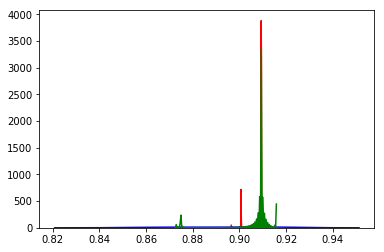

In [45]:
sns.distplot(owas_m4_alone, color='red', hist=False, kde=True)
sns.distplot(owas_m3_alone, color='blue', hist=False, kde=True)
sns.distplot(owas_m3_m4, color='green', hist=False, kde=True)